"""
Example of creating a CDCM (RC + HVAC) system  of a YABML
single zone deterministic building.

Author(s):
    Sreehari Manikkan

Date:
    05/23/2022
"""

In [1]:
import h5py
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from yabml import *
from cdcm import *

from building_system import make_building_cdcm_system
from single_zone_deterministic import single_zone_building

In [2]:
df = pd.read_csv("./rc_system_data/weather_data_2017_pandas.csv")

weather_sys = make_data_system(
    df[["Tout", "Qsg", "Qint"]],
    name="weather_sytem",
    column_units=["degC", "Wh", "Wh"],
    column_desciptions=[
        "Outdoor air temperature",
        "Solar irradiance",
        "Internal heat gain"
    ]
)


['Tout' 'Qsg' 'Qint'] ['degC', 'Wh', 'Wh'] ['Outdoor air temperature', 'Solar irradiance', 'Internal heat gain'] (True, True, True)


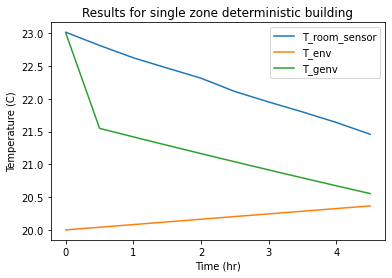

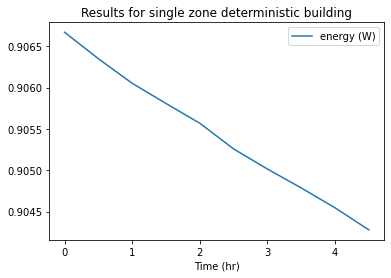

In [3]:
clock = make_clock(1800)
building_system = make_building_cdcm_system(single_zone_building,
                                            weather_sys,
                                            clock)[0]
max_steps = 10
file_name = "test1_building.h5"

if os.path.exists(file_name):
        os.remove(file_name)

test1_saver = SimulationSaver(file_name,
                            building_system,
                            max_steps=max_steps
)

for i in range(max_steps):
    building_system.forward()
    test1_saver.save()
    building_system.transition()


T_room_sensor = (
    test1_saver.file_handler[
        "/zone_cdcm_system/zone_rc_system/T_room_sensor"
    ][:]
)
T_env = (
    test1_saver.file_handler["/zone_cdcm_system/zone_rc_system/T_env"][:]
)
T_genv = (
    test1_saver.file_handler["/zone_cdcm_system/zone_rc_system/T_genv"][:]
)
energy = (
    test1_saver.file_handler["/zone_cdcm_system/zone_hvac_system/energy"][:]
)

time = np.arange(max_steps) * 0.5
plt.plot(time, T_room_sensor, label='T_room_sensor')
plt.plot(time, T_env, label='T_env')
plt.plot(time, T_genv, label='T_genv')
plt.ylabel('Temperature (C)')
plt.xlabel('Time (hr)')
plt.title('Results for single zone deterministic building')
plt.legend()
plt.show()

plt.plot(time, energy, label='energy (W)')
plt.xlabel('Time (hr)')
plt.title('Results for single zone deterministic building')
plt.legend()
plt.show()